In [ ]:
!pip install pycaret

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
train = pd.read_csv("/content/drive/My Drive/HackerEarth_Burnout/train.csv")
test = pd.read_csv("/content/drive/My Drive/HackerEarth_Burnout/test.csv")
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [11]:
## The employee ID is unique, it's just an ID to identify the Employe, So we are going to drop it for the train
train = train.drop(['Employee ID'], axis=1)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       22750 non-null  object 
 1   Gender                22750 non-null  object 
 2   Company Type          22750 non-null  object 
 3   WFH Setup Available   22750 non-null  object 
 4   Designation           22750 non-null  float64
 5   Resource Allocation   21369 non-null  float64
 6   Mental Fatigue Score  20633 non-null  float64
 7   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.4+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           12250 non-null  object 
 1   Date of Joining       12250 non-null  object 
 2   Gender                12250 non-null  object 
 3   Company Type          12250 non-null  object 
 4   WFH Setup Available   12250 non-null  object 
 5   Designation           12250 non-null  float64
 6   Resource Allocation   12250 non-null  float64
 7   Mental Fatigue Score  12250 non-null  float64
dtypes: float64(3), object(5)
memory usage: 765.8+ KB


Okay, so the good news is that the test have no missing values, but the train contains some. Im gonna drop all the row where the target is missing and see what is left

In [14]:
train = train.dropna(axis=0, subset=['Burn Rate'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       21626 non-null  object 
 1   Gender                21626 non-null  object 
 2   Company Type          21626 non-null  object 
 3   WFH Setup Available   21626 non-null  object 
 4   Designation           21626 non-null  float64
 5   Resource Allocation   20348 non-null  float64
 6   Mental Fatigue Score  19681 non-null  float64
 7   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.5+ MB


# Feature Engineering and Data Visualisation

## Usefull information

In [15]:
# Date
train['Date of Joining'] = pd.to_datetime(train['Date of Joining'])
test['Date of Joining'] = pd.to_datetime(test['Date of Joining'])
max_time = train['Date of Joining'].max()
min_time = train['Date of Joining'].min()
max_time = train['Date of Joining'].max()
min_time = train['Date of Joining'].min()
print(f'Date of Joining the company in the train set are between {str(max_time.year) + "/" + str(max_time.month)} and {str(min_time.year) + "/" +  str(min_time.month)}')
max_time = test['Date of Joining'].max()
min_time = test['Date of Joining'].min()
print(f'Date of Joining the company in the test set are between {str(max_time.year) + "/" + str(max_time.month)} and {str(min_time.year) + "/" +  str(min_time.month)}')

Date of Joining the company in the train set are between 2008/12 and 2008/1
Date of Joining the company in the test set are between 2008/12 and 2008/1


In [16]:
# Company Type
train['Company Type'].unique().tolist()

['Service', 'Product']

In [17]:
# For the rest, we have a built in function
train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,21626.000000,20348.000000,19681.000000,21626.000000
mean,2.178766,4.483831,5.729851,0.452005
std,1.135428,2.048170,1.920784,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


## Data Visualisation
### Gender ?

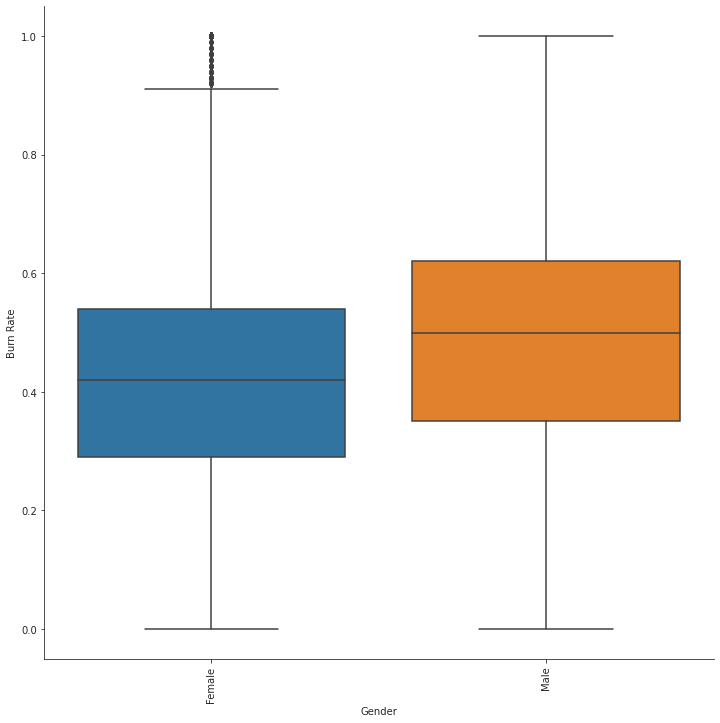

In [18]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.boxplot(x="Gender", y="Burn Rate", data=train, ax=ax)
plt.xticks(rotation=90)
sns.despine()

First of all, We can see a little difference between Male and Female. Male are more likely to burn out than women.

### Company Type

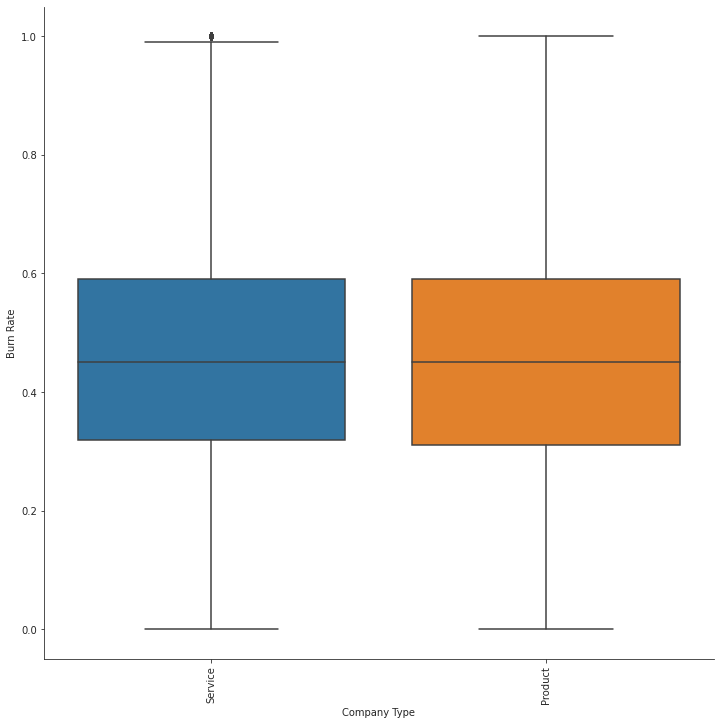

In [19]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.boxplot(x="Company Type", y="Burn Rate", data=train, ax=ax)
plt.xticks(rotation=90)
sns.despine()

I can't see any difference, coming from Service or from Product doesn't influence much the burning rate.

### WFH Setup Available

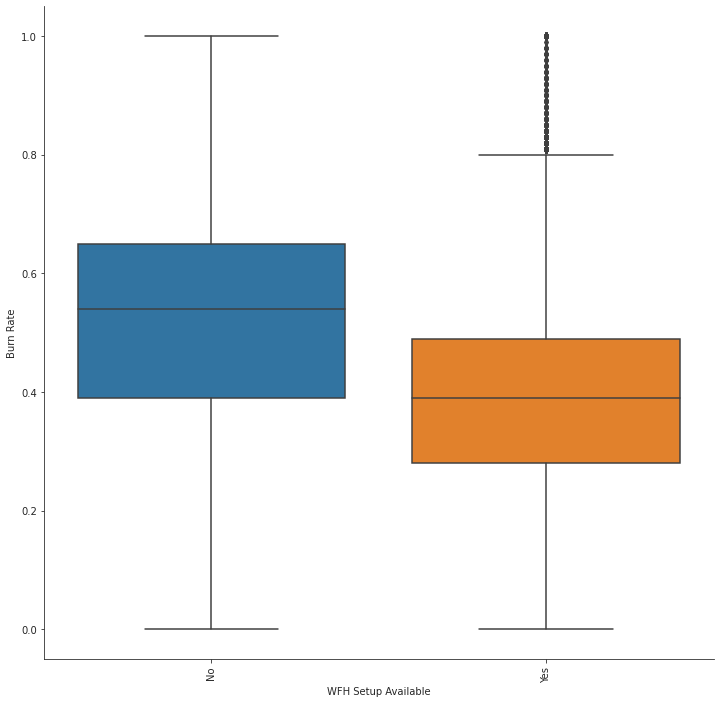

In [20]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.boxplot(x="WFH Setup Available", y="Burn Rate", data=train, ax=ax)
plt.xticks(rotation=90)
sns.despine()

Well, as you can see, the burning rate is higher for people who have no WFH Setup, which I think it's normal since working from home means that we are in our confort zone.

### Designation

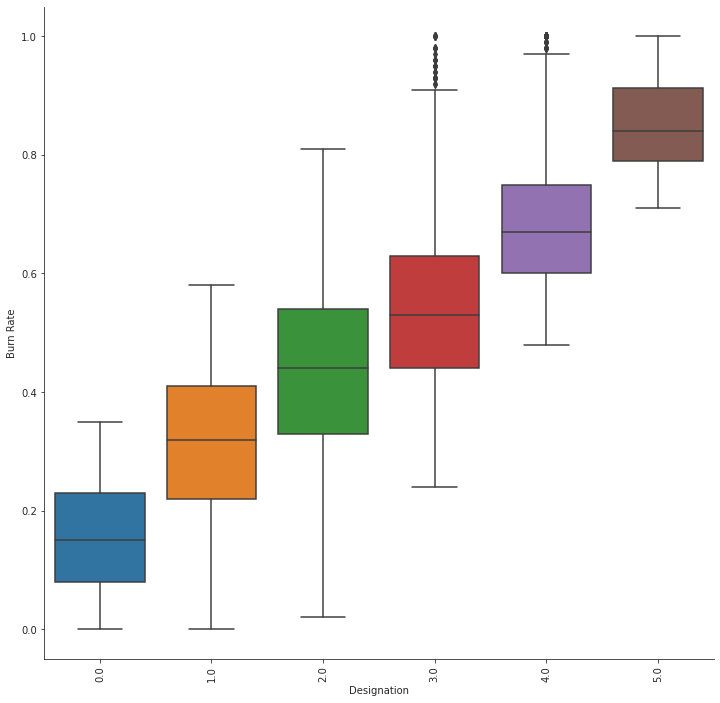

In [21]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.boxplot(x="Designation", y="Burn Rate", data=train, ax=ax)
plt.xticks(rotation=90)
sns.despine()

Well, we can see that having a high seniority level in codes leads to a higher burning rate .. Honestly I think it's normal, when you are at 5.0, it means that you have an important place in the company, thus you have a lot of responsability ... and you know sometimes overthinking and having responsability can lead to a burn out ;)

### Resource Allocation

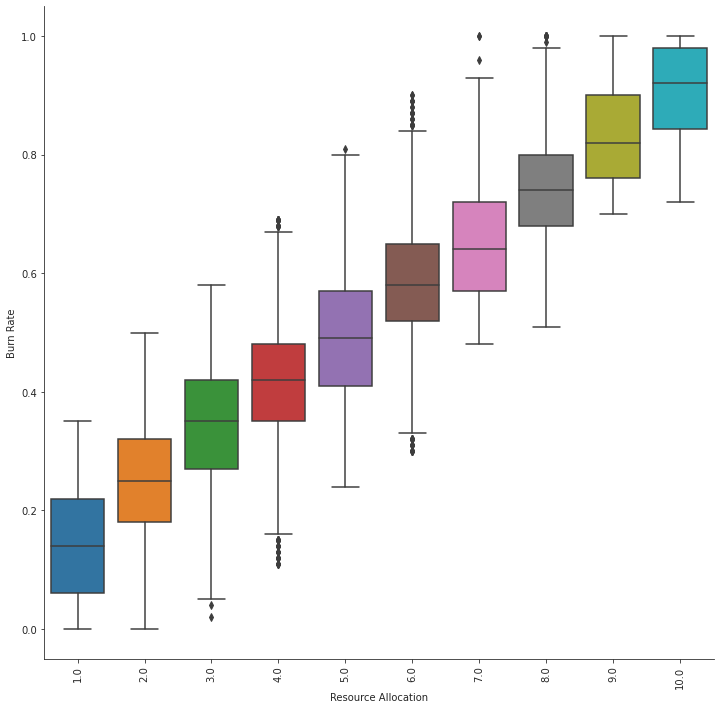

In [22]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.boxplot(x="Resource Allocation", y="Burn Rate", data=train, ax=ax)
plt.xticks(rotation=90)
sns.despine()

Well, I was expecting that .. The more you work, the more tired you get, the more likely you are to saturate and do shit haha

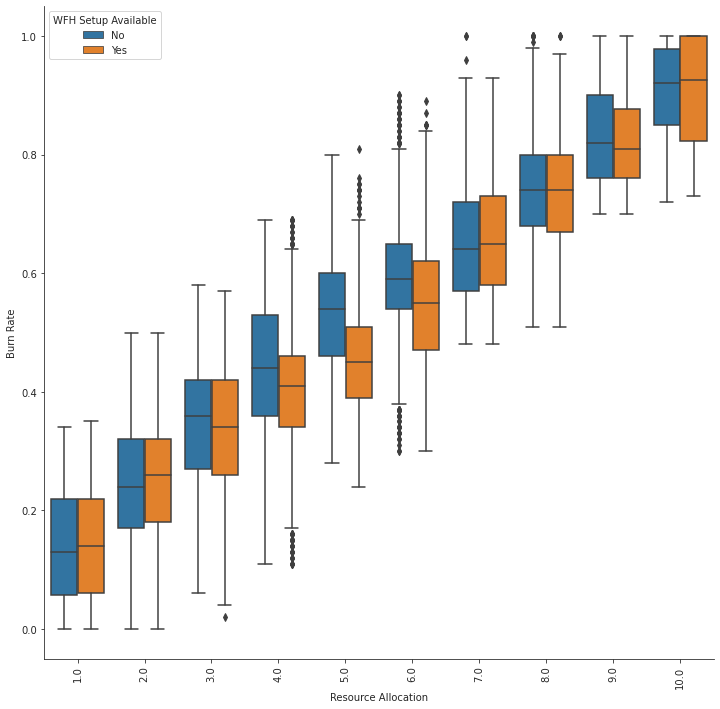

In [23]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.boxplot(x="Resource Allocation", y="Burn Rate", data=train, ax=ax, hue='WFH Setup Available')
plt.xticks(rotation=90)
sns.despine()

You can notice that for RA in [4,5,6], working from home can help to reduce the burning rate.

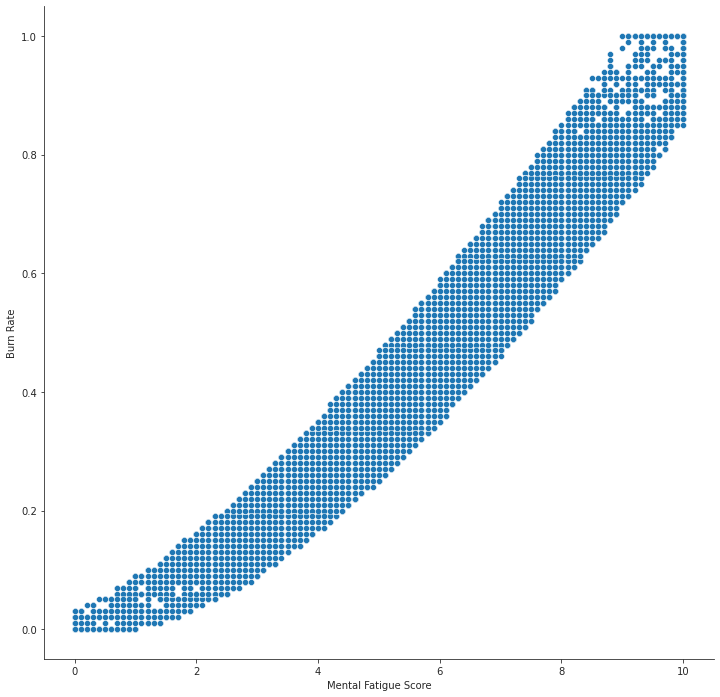

In [24]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.scatterplot(x="Mental Fatigue Score", y="Burn Rate", data=train, ax=ax)
sns.despine()

Well this is one of the most correlated feature with the target. No need to comment, it's obvious why it's correlated

### Dates

In [25]:
train['Month'] = train['Date of Joining'].dt.month
train['Day'] = train['Date of Joining'].dt.day
test['Day'] = test['Date of Joining'].dt.day
test['Month'] = test['Date of Joining'].dt.month

In [26]:
train = train.drop('Date of Joining', axis=1)
test = test.drop('Date of Joining', axis=1)

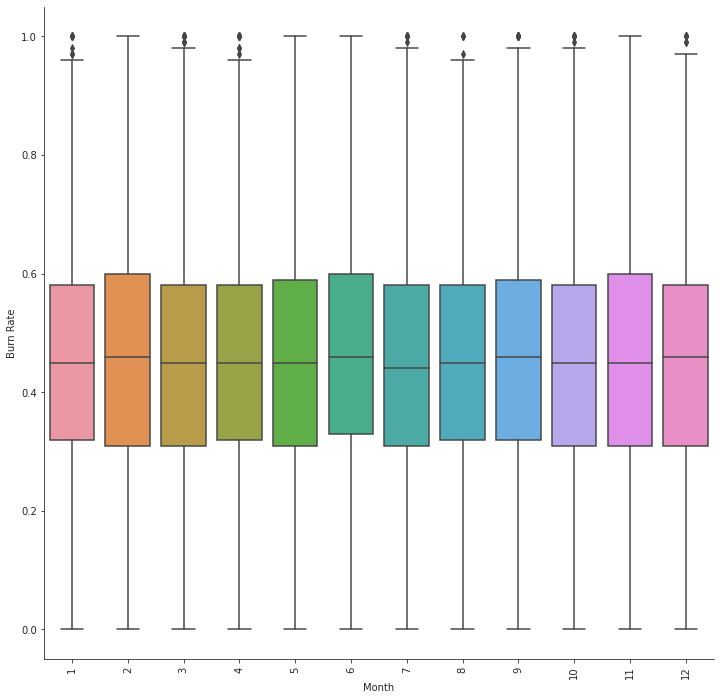

In [27]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 12)
sns.boxplot(x="Month", y="Burn Rate", data=train)
plt.xticks(rotation=90)
sns.despine()

Well I can't see any correlation between month ...

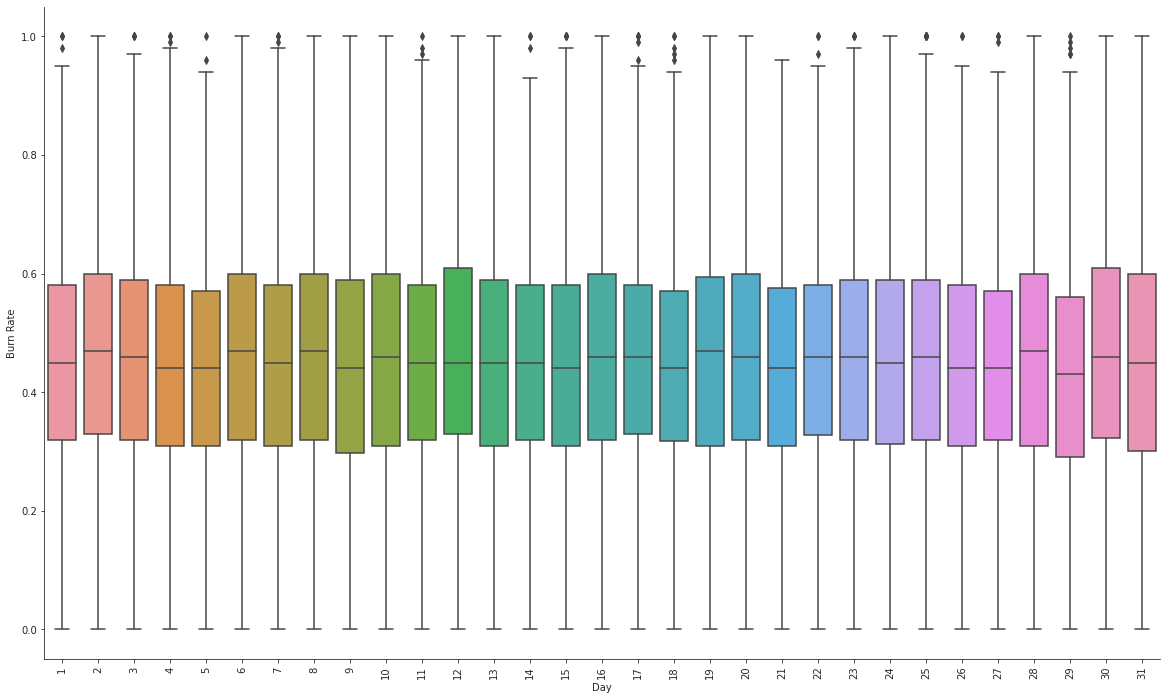

In [28]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 12)
sns.boxplot(x="Day", y="Burn Rate", data=train, ax=ax)
plt.xticks(rotation=90)
sns.despine()

## Label Encoding

In [29]:
train = train.replace('Male', 1)
train = train.replace('Female', 0)
train = train.replace('Yes', 0)
train = train.replace('No', 1)
train = train.replace('Service', 0)
train = train.replace('Product', 1) 
test = test.replace('Male', 1)
test = test.replace('Female', 0)
test = test.replace('Yes', 0)
test = test.replace('No', 1)
test = test.replace('Service', 0)
test = test.replace('Product', 1) 

In [30]:
train.describe()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Month,Day
count,21626.000000,21626.000000,21626.000000,21626.000000,20348.000000,19681.000000,21626.000000,21626.000000,21626.000000
mean,0.475215,0.346897,0.459678,2.178766,4.483831,5.729851,0.452005,6.509017,15.756867
std,0.499397,0.475994,0.498383,1.135428,2.048170,1.920784,0.198226,3.441459,8.779629
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,4.600000,0.310000,3.000000,8.000000
50%,0.000000,0.000000,0.000000,2.000000,4.000000,5.900000,0.450000,7.000000,16.000000
75%,1.000000,1.000000,1.000000,3.000000,6.000000,7.100000,0.590000,9.000000,23.000000
max,1.000000,1.000000,1.000000,5.000000,10.000000,10.000000,1.000000,12.000000,31.000000


In [31]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Month,Day
Gender,1.00,0.01,0.07,0.11,0.14,0.15,0.15,0.00,-0.00
Company Type,0.01,1.00,0.00,-0.01,-0.01,-0.00,-0.00,-0.00,0.00
WFH Setup Available,0.07,0.00,1.00,0.23,0.29,0.28,0.31,0.00,-0.00
Designation,0.11,-0.01,0.23,1.00,0.88,0.69,0.74,-0.00,-0.00
Resource Allocation,0.14,-0.01,0.29,0.88,1.00,0.80,0.86,-0.00,-0.01
Mental Fatigue Score,0.15,-0.00,0.28,0.69,0.80,1.00,0.94,0.00,0.00
Burn Rate,0.15,-0.00,0.31,0.74,0.86,0.94,1.00,-0.00,-0.00
Month,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,0.01
Day,-0.00,0.00,-0.00,-0.00,-0.01,0.00,-0.00,0.01,1.00


As we can see, Month, Day and Company Type have no influence what so ever, I will drop them for now

In [32]:
import copy
train_0 = copy.deepcopy(train)
test_0 = copy.deepcopy(test)
train_0 = train_0.drop(['Company Type', 'Month', 'Day'], axis=1)
test_0 = test_0.drop(['Company Type', 'Month', 'Day'], axis=1)

## Filling NaN Values
When I look at the corr matrix, and knowing that Resource Allocation and Mental Fatigue Score are missing, I think we can fill these missing values with some techniques.
I know that there are no missing values in the test set, so Im going to do a linear regression in order to fill the NaN values 

In [33]:
## Mental Fatigue Score
x_train_RA = train_0[train_0['Resource Allocation'].notnull()].dropna(subset=['Mental Fatigue Score'], axis=0) # Training on All columns + Resource Allocation
x_train = train_0.drop(['Resource Allocation'], axis=1).dropna(subset=['Mental Fatigue Score'], axis=0) # Training on All columns only (without Resource Allocation)

In [34]:
X_RA, y_RA = x_train_RA.drop(['Mental Fatigue Score'], axis=1), x_train_RA['Mental Fatigue Score']
X, y = x_train.drop(['Mental Fatigue Score'], axis=1), x_train['Mental Fatigue Score']
from sklearn.linear_model import LinearRegression
lm_RA_MFS = LinearRegression().fit(X_RA, y_RA)
lm_MFS = LinearRegression().fit(X,y)

In [35]:
## Resource Allocation
x_train_MFS = train_0[train_0['Mental Fatigue Score'].notnull()].dropna(subset=['Resource Allocation'], axis=0) # Training on All columns + Mental Fatigue Score
x_train = train_0.drop(['Mental Fatigue Score'], axis=1).dropna(subset=['Resource Allocation'], axis=0) # Training on All columns only

In [36]:
X_MFS, y_MFS = x_train_MFS.drop(['Resource Allocation'], axis=1), x_train_MFS['Resource Allocation']
X, y = x_train.drop(['Resource Allocation'], axis=1), x_train['Resource Allocation']
lm_MFS_RA = LinearRegression().fit(X_MFS, y_MFS)
lm_RA = LinearRegression().fit(X,y)

In [37]:
def fill_na_MFS(x):
  if x['Mental Fatigue Score'] == x['Mental Fatigue Score']:
    return x['Mental Fatigue Score']
  if x['Resource Allocation'] == x['Resource Allocation']:
    return lm_RA_MFS.predict([x.drop('Mental Fatigue Score').tolist()])[0]
  return lm_MFS.predict([x.drop(['Resource Allocation', 'Mental Fatigue Score']).tolist()])[0]
def fill_na_RA(x):
  if x['Resource Allocation'] == x['Resource Allocation']:
    return x['Resource Allocation']
  if x['Mental Fatigue Score'] == x['Mental Fatigue Score']:
    return lm_MFS_RA.predict([x.drop('Resource Allocation').tolist()])[0]
  return lm_RA.predict([x.drop(['Mental Fatigue Score', 'Resource Allocation']).tolist()])[0]

In [38]:
train_0['Mental Fatigue Score'] = train_0.apply(fill_na_MFS, axis=1)
train_0['Resource Allocation'] = train_0.apply(fill_na_RA, axis=1)

In [39]:
train_0.describe()

,Gender,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,21626.000000,21626.000000,21626.000000,21626.000000,21626.000000,21626.000000
mean,0.475215,0.459678,2.178766,4.482446,5.730001,0.452005
std,0.499397,0.498383,1.135428,2.039110,1.914946,0.198226
min,0.000000,0.000000,0.000000,0.240761,0.000000,0.000000
25%,0.000000,0.000000,1.000000,3.000000,4.500000,0.310000
50%,0.000000,0.000000,2.000000,4.000000,5.900000,0.450000
75%,1.000000,1.000000,3.000000,6.000000,7.100000,0.590000
max,1.000000,1.000000,5.000000,10.000000,10.838859,1.000000


In [40]:
train.describe()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Month,Day
count,21626.000000,21626.000000,21626.000000,21626.000000,20348.000000,19681.000000,21626.000000,21626.000000,21626.000000
mean,0.475215,0.346897,0.459678,2.178766,4.483831,5.729851,0.452005,6.509017,15.756867
std,0.499397,0.475994,0.498383,1.135428,2.048170,1.920784,0.198226,3.441459,8.779629
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,4.600000,0.310000,3.000000,8.000000
50%,0.000000,0.000000,0.000000,2.000000,4.000000,5.900000,0.450000,7.000000,16.000000
75%,1.000000,1.000000,1.000000,3.000000,6.000000,7.100000,0.590000,9.000000,23.000000
max,1.000000,1.000000,1.000000,5.000000,10.000000,10.000000,1.000000,12.000000,31.000000


Well, we have a good news, we didn't change the distribution of the columns with missing values

# Model with PyCaret

In [ ]:
from pycaret.regression import *
exp_reg = setup(train_0, target='Burn Rate', session_id = 123, silent=True)

In [42]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0402,0.0025,0.0504,0.9355,0.0345,0.1200,2.796
xgboost,Extreme Gradient Boosting,0.0400,0.0026,0.0508,0.9345,0.0348,0.1195,0.981
lightgbm,Light Gradient Boosting Machine,0.0408,0.0026,0.0509,0.9342,0.0349,0.1222,0.093
gbr,Gradient Boosting Regressor,0.0420,0.0027,0.0518,0.9319,0.0355,0.1247,0.450
ridge,Ridge Regression,0.0438,0.0029,0.0541,0.9259,0.0372,0.1334,0.015
lar,Least Angle Regression,0.0438,0.0029,0.0541,0.9259,0.0372,0.1334,0.015
br,Bayesian Ridge,0.0438,0.0029,0.0541,0.9259,0.0372,0.1334,0.015
lr,Linear Regression,0.0438,0.0029,0.0541,0.9259,0.0372,0.1334,0.297
huber,Huber Regressor,0.0438,0.0029,0.0541,0.9257,0.0372,0.1326,0.046
rf,Random Forest Regressor,0.0425,0.0030,0.0548,0.9237,0.0375,0.1270,1.427


In [43]:
# Take the 3 bests models
catb = create_model('catboost', verbose=False)
xgb = create_model('xgboost', verbose=False)
lgbm = create_model('lightgbm', verbose=False)

In [44]:
# Blend all the 4 bests models
blend_all = blend_models(estimator_list = [catb, xgb, lgbm])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0408,0.0026,0.0512,0.9337,0.0349,0.1209
1,0.0406,0.0026,0.0513,0.9366,0.0351,0.1218
2,0.0413,0.0027,0.0515,0.9368,0.0354,0.1267
3,0.0397,0.0024,0.0493,0.9376,0.0339,0.1248
4,0.0401,0.0026,0.0508,0.9327,0.0346,0.1149
5,0.0395,0.0024,0.0494,0.9395,0.0341,0.1205
6,0.0398,0.0025,0.0505,0.9366,0.0345,0.1172
7,0.0405,0.0026,0.0510,0.9309,0.0348,0.1165
8,0.0400,0.0026,0.0506,0.9322,0.0345,0.1156
9,0.0392,0.0025,0.0497,0.9362,0.0340,0.1216


In [45]:
# Finalise models and make predictions
final_blender = finalize_model(blend_all)
predictions = predict_model(final_blender, data = test_0)
predictions.head()

,Employee ID,Gender,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Label
0,fffe31003300390039003000,0,1,2.0,5.0,7.7,0.615570
1,fffe31003300310037003800,0,0,1.0,2.0,5.2,0.357928
2,fffe33003400380035003900,1,0,1.0,3.0,5.9,0.431923
3,fffe3100370039003200,0,1,3.0,6.0,4.6,0.377265
4,fffe32003600390036003700,0,1,2.0,5.0,6.4,0.531813


In [46]:
predictions['Burn Rate'] = predictions['Label']
predictions[['Employee ID', 'Burn Rate']].to_csv("/content/drive/My Drive/HackerEarth_Burnout/submission.csv", index=False)

**Well, We got a score of 93.06362 which gives the rank number ONE.**

## Advanced Settings

In [ ]:
exp_reg = setup(train_0, target='Burn Rate', session_id = 123, silent=True, normalize = True, normalize_method = 'zscore',
             transformation = True, polynomial_features = True, 
             trigonometry_features = True
               )

In [48]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0402,0.0025,0.0505,0.9355,0.0345,0.1198,2.815
xgboost,Extreme Gradient Boosting,0.0400,0.0026,0.0508,0.9345,0.0348,0.1195,1.029
lightgbm,Light Gradient Boosting Machine,0.0408,0.0026,0.0510,0.9341,0.0349,0.1222,0.119
gbr,Gradient Boosting Regressor,0.0420,0.0027,0.0518,0.9319,0.0355,0.1247,0.464
ridge,Ridge Regression,0.0446,0.0030,0.0544,0.9250,0.0377,0.1405,0.014
lar,Least Angle Regression,0.0446,0.0030,0.0544,0.9250,0.0377,0.1405,0.015
br,Bayesian Ridge,0.0446,0.0030,0.0544,0.9250,0.0377,0.1405,0.015
lr,Linear Regression,0.0446,0.0030,0.0544,0.9250,0.0377,0.1405,0.232
huber,Huber Regressor,0.0445,0.0030,0.0545,0.9248,0.0378,0.1410,0.034
rf,Random Forest Regressor,0.0425,0.0030,0.0548,0.9237,0.0375,0.1270,1.433


In [49]:
# tune the 3 bests models
catb = tune_model(create_model('catboost', verbose=False))
xgb = tune_model(create_model('xgboost', verbose=False))
lgbm = tune_model(create_model('lightgbm', verbose=False))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0430,0.0028,0.0528,0.9293,0.0361,0.1247
1,0.0426,0.0028,0.0527,0.9330,0.0360,0.1239
2,0.0434,0.0028,0.0531,0.9329,0.0365,0.1311
3,0.0416,0.0026,0.0507,0.9340,0.0348,0.1256
4,0.0417,0.0027,0.0517,0.9301,0.0354,0.1197
5,0.0412,0.0026,0.0507,0.9363,0.0350,0.1248
6,0.0416,0.0027,0.0518,0.9334,0.0355,0.1212
7,0.0421,0.0027,0.0521,0.9280,0.0355,0.1207
8,0.0414,0.0027,0.0516,0.9295,0.0352,0.1183
9,0.0411,0.0026,0.0510,0.9328,0.0349,0.1255


In [50]:
# Blend all the 4 bests models
blend_all = blend_models(estimator_list = [catb, xgb, lgbm])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0417,0.0027,0.0517,0.9323,0.0353,0.1217
1,0.0416,0.0027,0.0518,0.9353,0.0355,0.1228
2,0.0427,0.0028,0.0525,0.9344,0.0361,0.1297
3,0.0407,0.0025,0.0499,0.9361,0.0343,0.1252
4,0.0409,0.0026,0.0513,0.9312,0.0351,0.1185
5,0.0404,0.0025,0.0500,0.9382,0.0345,0.1235
6,0.0408,0.0026,0.0510,0.9352,0.0350,0.1197
7,0.0414,0.0027,0.0517,0.9292,0.0352,0.1190
8,0.0407,0.0026,0.0511,0.9308,0.0349,0.1166
9,0.0401,0.0025,0.0504,0.9345,0.0345,0.1239


In [51]:
# Finalise models and make predictions
final_blender = finalize_model(blend_all)
predictions = predict_model(final_blender, data = test_0)
predictions.head()

,Employee ID,Gender,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Label
0,fffe31003300390039003000,0,1,2.0,5.0,7.7,0.618796
1,fffe31003300310037003800,0,0,1.0,2.0,5.2,0.354643
2,fffe33003400380035003900,1,0,1.0,3.0,5.9,0.432129
3,fffe3100370039003200,0,1,3.0,6.0,4.6,0.378775
4,fffe32003600390036003700,0,1,2.0,5.0,6.4,0.531691


In [52]:
predictions['Burn Rate'] = predictions['Label']
predictions[['Employee ID', 'Burn Rate']].to_csv("/content/drive/My Drive/HackerEarth_Burnout/submission_1.csv", index=False)

The score is 92.98050 which is worse than before, trying an advanced setting wasn't useful here. 